In [59]:
import pandas as pd

ret = pd.read_csv("data.tsv" , delimiter="\t").set_axis(labels=["movie_id", "average_rating", "number of ratings"], axis=1)

ret[500:]

,movie_id,average_rating,number of ratings
500,tt0000809,6.2,62
501,tt0000815,4.6,66
502,tt0000816,4.7,124
503,tt0000817,4.1,18
504,tt0000819,5.2,67
...,...,...,...
1256801,tt9916690,6.5,6
1256802,tt9916720,5.2,248
1256803,tt9916730,8.4,6
1256804,tt9916766,6.8,21


In [60]:
ratings_KV = pd.DataFrame()
ratings_KV["rating_key"] = ret["average_rating"].round().astype(int)
ratings_KV["movie_id_value"] = ret["movie_id"]

ratings_KV[ratings_KV["rating_key"] == 6][380:]

,rating_key,movie_id_value
1150,6,tt0002678
1156,6,tt0002736
1160,6,tt0002753
1162,6,tt0002759
1164,6,tt0002767
...,...,...
1256786,6,tt9916406
1256795,6,tt9916576
1256799,6,tt9916670
1256800,6,tt9916682


In [61]:
results = pd.read_csv("spark_results.csv", index_col=0)

results.sort_values(by="P_value", ascending=False, inplace=True)

results

,P_value,job1_time,job2 kind,job2_time,job3_time,multipositive_counter,multipositive_rate,num_cores_per_executor,num_executors
3,1.000000e-01,8.266,base,22.702,7.849,774845.0,6.165187e-01,4.0,12.0
4,1.000000e-01,5.413,aggregate_by_key,3.317,7.523,774845.0,6.165187e-01,4.0,12.0
5,1.000000e-01,5.884,group_by_key,2.445,8.012,774845.0,6.165187e-01,4.0,12.0
6,1.000000e-02,5.396,base,42.488,8.619,109907.0,8.744939e-02,4.0,12.0
7,1.000000e-02,5.345,aggregate_by_key,3.661,8.331,109907.0,8.744939e-02,4.0,12.0
8,1.000000e-02,5.169,group_by_key,2.812,8.799,109907.0,8.744939e-02,4.0,12.0
11,1.000000e-03,4.977,group_by_key,3.406,8.820,11331.0,9.015704e-03,4.0,12.0
9,1.000000e-03,5.628,base,69.689,8.815,11331.0,9.015704e-03,4.0,12.0
10,1.000000e-03,5.440,aggregate_by_key,3.999,9.768,11331.0,9.015704e-03,4.0,12.0
12,1.000000e-04,5.071,base,85.575,9.588,1165.0,9.269522e-04,4.0,12.0


In [62]:
results.sort_values(by=["job2 kind", "P_value"], ascending=False)

,P_value,job1_time,job2 kind,job2_time,job3_time,multipositive_counter,multipositive_rate,num_cores_per_executor,num_executors
5,1.000000e-01,5.884,group_by_key,2.445,8.012,774845.0,6.165187e-01,4.0,12.0
8,1.000000e-02,5.169,group_by_key,2.812,8.799,109907.0,8.744939e-02,4.0,12.0
11,1.000000e-03,4.977,group_by_key,3.406,8.820,11331.0,9.015704e-03,4.0,12.0
14,1.000000e-04,4.758,group_by_key,4.243,10.198,1165.0,9.269522e-04,4.0,12.0
17,1.000000e-05,5.332,group_by_key,4.631,10.083,114.0,9.070605e-05,4.0,12.0
2,1.000000e-06,5.411,group_by_key,5.508,10.418,8.0,6.365337e-06,4.0,12.0
21,1.000000e-07,5.371,group_by_key,5.928,10.719,1.0,7.956671e-07,4.0,12.0
3,1.000000e-01,8.266,base,22.702,7.849,774845.0,6.165187e-01,4.0,12.0
6,1.000000e-02,5.396,base,42.488,8.619,109907.0,8.744939e-02,4.0,12.0
9,1.000000e-03,5.628,base,69.689,8.815,11331.0,9.015704e-03,4.0,12.0


c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

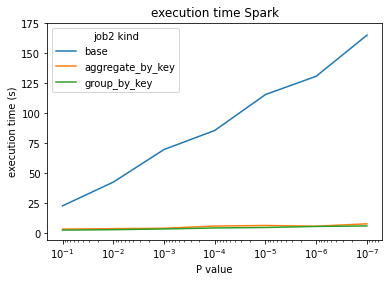

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.lineplot(results["P_value"], results["job2_time"], hue=results["job2 kind"])

ax = plt.gca()

ax.set_xscale('log')

ax.invert_xaxis()

ax.set_title("execution time Spark")

ax.set_xlabel("P value")

ax.set_ylabel("execution time (s)")

plt.plot()

In [64]:
import math

def getM(n, p) -> int:
    return int(-(n * math.log(p))/(math.log(2)**2))


def getK(m, n) -> int:
    return int((m/n) * math.log(2))

N_pairs = [(8, 349048), (6, 223904), (7, 377578), (5, 103731), (10, 16957), (4, 45072), (9, 112605), (3, 18576), (2, 6752), (1, 2584)]

N = [
    2584,
    6752,
    18576,
    45072,
    103731,
    223904,
    377578,
    349048,
    112605,
    16957
]

K = [0] * 10

M = [0] * 10

df_m_k = pd.DataFrame(columns=["P", "rating", "n",  "k", "m"])

for p in [0.1, 0.01, 0.001, 0.0001, 0.00001,0.000001]:
    for k, n in enumerate(N):
        M[k] = getM(n, p)
        K[k] = getK(M[k], n)
        row = {
            "rating"    : k + 1,
            "n"         : int(n),
            "P"         : p,
            "k"         : K[k],
            "m"         : M[k]
        }
        df_m_k = df_m_k.append(row, ignore_index=True)

df_m_k["n"] = df_m_k["n"].astype(int)
df_m_k["m"] = df_m_k["m"].astype(int)
df_m_k["k"] = df_m_k["k"].astype(int)
df_m_k["rating"] = df_m_k["rating"].astype(int)
print()
print()
print(df_m_k[["P", "rating", "n",  "k", "m"]][54:].to_latex())


C:\Users\giaco\AppData\Local\Temp\ipykernel_5456\215113435.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m_k = df_m_k.append(row, ignore_index=True)
C:\Users\giaco\AppData\Local\Temp\ipykernel_5456\215113435.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m_k = df_m_k.append(row, ignore_index=True)
C:\Users\giaco\AppData\Local\Temp\ipykernel_5456\215113435.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m_k = df_m_k.append(row, ignore_index=True)
C:\Users\giaco\AppData\Local\Temp\ipykernel_5456\215113435.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m_k = df_m_k.append(row, ignore_index=True)
C:\Users



\begin{tabular}{llrrrr}
\toprule
{} &         P &  rating &       n &   k &         m \\
\midrule
54 &  0.000001 &       5 &  103731 &  19 &   2982803 \\
55 &  0.000001 &       6 &  223904 &  19 &   6438398 \\
56 &  0.000001 &       7 &  377578 &  19 &  10857321 \\
57 &  0.000001 &       8 &  349048 &  19 &  10036936 \\
58 &  0.000001 &       9 &  112605 &  19 &   3237976 \\
59 &  0.000001 &      10 &   16957 &  19 &    487601 \\
\bottomrule
\end{tabular}



C:\Users\giaco\AppData\Local\Temp\ipykernel_5456\215113435.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m_k = df_m_k.append(row, ignore_index=True)
C:\Users\giaco\AppData\Local\Temp\ipykernel_5456\215113435.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m_k = df_m_k.append(row, ignore_index=True)
C:\Users\giaco\AppData\Local\Temp\ipykernel_5456\215113435.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m_k = df_m_k.append(row, ignore_index=True)
C:\Users\giaco\AppData\Local\Temp\ipykernel_5456\215113435.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m_k = df_m_k.append(row, ignore_index=True)
C:\Users

c:\Python39\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Index(['P', 'rating', 'n', 'k', 'm'], dtype='object')


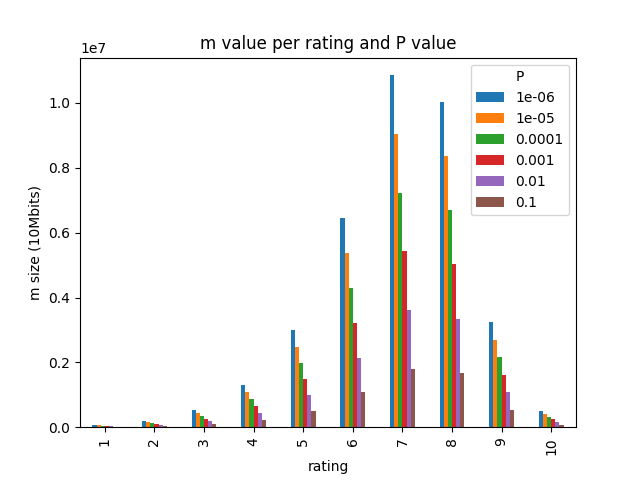

In [65]:
print( df_m_k.columns)
tmp = df_m_k.drop(["n", "k"], axis=1).sort_values("P", ascending=False)

%matplotlib ipympl

#https://stackoverflow.com/questions/47796264/how-to-create-a-grouped-bar-plot
ax = tmp.pivot("rating", "P", "m").plot(kind='bar')

ax.set_title("m value per rating and P value")

ax.set_ylabel("m size (10Mbits)")


plt.show()

# plot grouped bar chart
#tmp.plot(x='rating',
#        kind='bar',
#        stacked=False,
#        title='Grouped Bar Graph with dataframe', color=tmp["P"])


[]

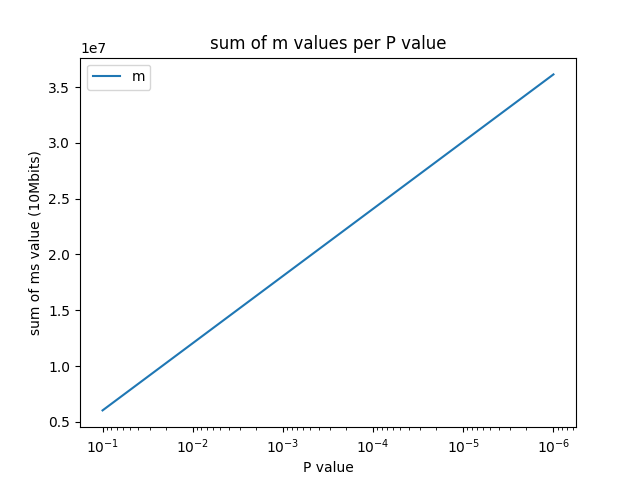

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
df_total_m_per_P = df_m_k.groupby("P").sum().drop(["k", "n", "rating"], axis=1)


df_total_m_per_P.plot()
#print(df_total_m_per_P.columns)
#plt.plot(results["P_value"], results["job2_time"], hue=results["job2 kind"])
#print(df_total_m_per_P, df_total_m_per_P.columns)
#plt.plot(df_total_m_per_P)  # ["P"], df_total_m_per_P["m"]

ax = plt.gca()

ax.set_xscale('log')

ax.invert_xaxis()

ax.set_title("sum of m values per P value")

ax.set_xlabel("P value")

ax.set_ylabel("sum of ms value (10Mbits)")

plt.plot()


In [67]:
res_tmp = results[["P_value", "multipositive_counter", "multipositive_rate"]]

res_tmp = res_tmp.drop_duplicates()#.set_index("P_value")#.drop("multipositive_rate", axis=1)

res_tmp["mprperc"] = res_tmp["multipositive_rate"] * 100

res_ltx = res_tmp[["P_value", "multipositive_counter"]]
res_ltx["multipositive_counter"] = res_ltx["multipositive_counter"].astype(int)
res_ltx["MPR"] = res_tmp["mprperc"].round(4).astype(str) + "%"

print( res_ltx.to_latex() )

\begin{tabular}{lrrl}
\toprule
{} &       P\_value &  multipositive\_counter &       MPR \\
\midrule
3  &  1.000000e-01 &                 774845 &  61.6519\% \\
6  &  1.000000e-02 &                 109907 &   8.7449\% \\
11 &  1.000000e-03 &                  11331 &   0.9016\% \\
12 &  1.000000e-04 &                   1165 &   0.0927\% \\
15 &  1.000000e-05 &                    114 &   0.0091\% \\
0  &  1.000000e-06 &                      8 &   0.0006\% \\
18 &  1.000000e-07 &                      1 &   0.0001\% \\
\bottomrule
\end{tabular}



C:\Users\giaco\AppData\Local\Temp\ipykernel_5456\940557775.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_ltx["multipositive_counter"] = res_ltx["multipositive_counter"].astype(int)
C:\Users\giaco\AppData\Local\Temp\ipykernel_5456\940557775.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_ltx["MPR"] = res_tmp["mprperc"].round(4).astype(str) + "%"
C:\Users\giaco\AppData\Local\Temp\ipykernel_5456\940557775.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the

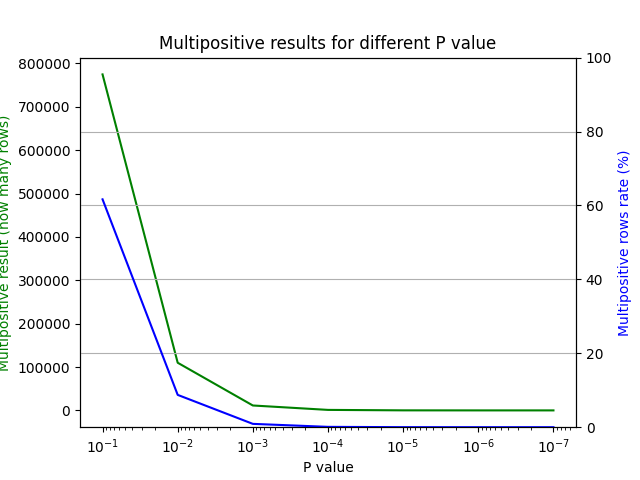

In [68]:
fig, ax1 = plt.subplots()
ax1.plot(res_tmp["P_value"], res_tmp["multipositive_counter"], 'g-')

ax = plt.gca()
ax.set_xscale('log')
ax.invert_xaxis()

ax2 = ax.twinx()
ax2.plot(res_tmp["P_value"], res_tmp["mprperc"], 'b-')
ax2.set_ylim((0,100))


ax.set_title("Multipositive results for different P value")

ax.set_xlabel("P value")

ax.set_ylabel("Multipositive result (how many rows)", color='g')


ax2.set_ylabel('Multipositive rows rate (%)', color='b')

plt.grid(axis="y")

plt.show()


### Evaluations over different NUM_CORES and NUM_EXECUTORS parameters values
- with fixed P value and fixed job 2 implementation type
- partitions == num executors

In [6]:
import pandas as pd

res_t = pd.read_csv("spark_results_CORES_EXECUTORS.csv", index_col=0)


res_t["threads"] = res_t["num_executors"] * res_t["num_cores_per_executor"]
res_t["total_time"] = res_t["job1_time"] + res_t["job2_time"] + res_t["job3_time"]

#res_t.sort_values(by="threads", ascending=False, inplace=True)

res_t.sort_values(by="total_time", ascending=True, inplace=True)

res_t.drop(["P_value", "job2 kind", "multipositive_counter", "multipositive_rate"], axis=1, inplace=True)

res_t


,job1_time,job2_time,job3_time,num_cores_per_executor,num_executors,RDD_partitions,threads,total_time
32,5.256,5.090,10.636,4.0,4.0,4,16.0,20.982
35,5.275,5.462,10.274,2.0,8.0,8,16.0,21.011
49,5.038,6.739,9.356,3.0,12.0,12,36.0,21.133
47,5.177,5.577,10.475,3.0,4.0,4,12.0,21.229
31,5.452,5.278,10.634,2.0,4.0,4,8.0,21.364
36,5.214,5.481,11.177,4.0,8.0,8,32.0,21.872
48,5.179,6.226,11.286,3.0,8.0,8,24.0,22.691
39,5.622,6.692,10.415,2.0,12.0,12,24.0,22.729
43,5.204,7.243,10.645,2.0,16.0,16,32.0,23.092
40,5.513,6.590,11.087,4.0,12.0,12,48.0,23.190


C:\Users\giaco\AppData\Local\Temp\ipykernel_10296\2280851695.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by=x_label, axis=0, inplace=True)


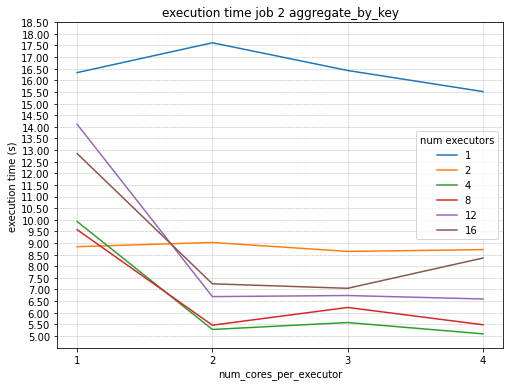

In [7]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from numpy import arange

y_label = "job2_time"  # "total_time"
x_label = "num_cores_per_executor"
grouping_label = "num_executors"
df1 = res_t[[y_label, x_label, grouping_label]]

#print(df1.columns)

df1.sort_values(by=x_label, axis=0, inplace=True)
#df1.set_index(x_label, inplace=True)


fig, ax = plt.subplots(figsize=(8, 6))

#tmp = df1.groupby(grouping_label).plot(x=x_label, y=y_label, ax=ax, label=grouping_label)

for label, df_tmp in df1.groupby(grouping_label):
    df_tmp.sort_values(x_label, axis=0, ascending=True, inplace=True)

    df_tmp.plot(x=x_label, y=y_label, ax=ax, label=int(label))

ax.legend(title="num executors")
plt.ylabel("execution time (s)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

#plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.xticks(range(1, 5)) #to hide decimals from the x axis

plt.yticks(arange(int(min(df1[y_label])), max(df1[y_label])+1, 0.5))


plt.grid(linestyle='--', linewidth=0.5)

ax.set_title("execution time job 2 aggregate_by_key | num partitions = num executors")

plt.show()

C:\Users\giaco\AppData\Local\Temp\ipykernel_10296\1301614800.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values(by=x_label, axis=0, inplace=True)


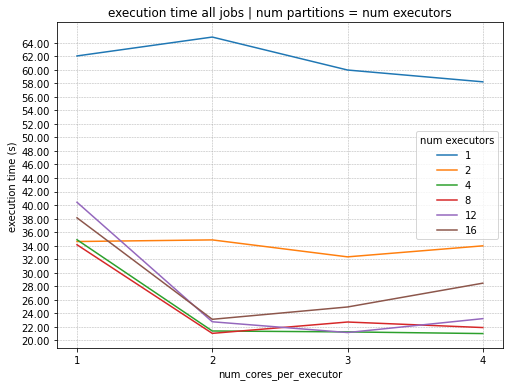

In [9]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from numpy import arange

y_label = "total_time"
x_label = "num_cores_per_executor"
grouping_label = "num_executors"
df1 = res_t[[y_label, x_label, grouping_label]]

#print(df1.columns)

df1.sort_values(by=x_label, axis=0, inplace=True)
#df1.set_index(x_label, inplace=True)


fig, ax = plt.subplots(figsize=(8, 6))

#tmp = df1.groupby(grouping_label).plot(x=x_label, y=y_label, ax=ax, label=grouping_label)

for label, df_tmp in df1.groupby(grouping_label):
    df_tmp.sort_values(x_label, axis=0, ascending=True, inplace=True)

    df_tmp.plot(x=x_label, y=y_label, ax=ax, label=int(label))

ax.legend(title="num executors")
plt.ylabel("execution time (s)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

#plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.xticks(range(1, 5))  # to hide decimals from the x axis

plt.yticks(arange(int(min(df1[y_label])), max(df1[y_label])+1, 2))


plt.grid(linestyle='--', linewidth=0.5)

ax.set_title("execution time all jobs | num partitions = num executors")

plt.show()


### Same test, but here partitions = num_exec x cores_per_executor


In [10]:
import pandas as pd

res_t_m = pd.read_csv("spark_results_CORES_EXECUTORS_partitionsMANY.csv", index_col=0)


res_t_m["threads"] = res_t_m["num_executors"] * \
    res_t_m["num_cores_per_executor"]
res_t_m["total_time"] = res_t_m["job1_time"] + \
    res_t_m["job2_time"] + res_t_m["job3_time"]

#res_t_m.sort_values(by="threads", ascending=False, inplace=True)

res_t_m.sort_values(by="total_time", ascending=True, inplace=True)

res_t_m.drop(["P_value", "job2 kind", "multipositive_counter",
           "multipositive_rate"], axis=1, inplace=True)

res_t_m


,job1_time,job2_time,job3_time,num_cores_per_executor,num_executors,RDD_partitions,threads,total_time
73,5.438,6.769,9.428,4.0,4.0,16.0,16.0,21.635
72,5.163,6.612,9.918,3.0,4.0,12.0,12.0,21.693
71,5.828,5.690,10.307,2.0,4.0,8.0,8.0,21.825
78,5.317,6.806,11.341,3.0,8.0,24.0,24.0,23.464
81,5.514,7.435,10.575,2.0,12.0,24.0,24.0,23.524
86,5.821,7.104,11.327,2.0,16.0,32.0,32.0,24.252
77,5.642,7.900,10.749,2.0,8.0,16.0,16.0,24.291
67,8.102,5.311,10.890,3.0,2.0,6.0,6.0,24.303
82,5.912,7.893,11.501,3.0,12.0,36.0,36.0,25.306
79,5.488,7.680,12.154,4.0,8.0,32.0,32.0,25.322


C:\Users\giaco\AppData\Local\Temp\ipykernel_10296\686549381.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_m.sort_values(by=x_label, axis=0, inplace=True)


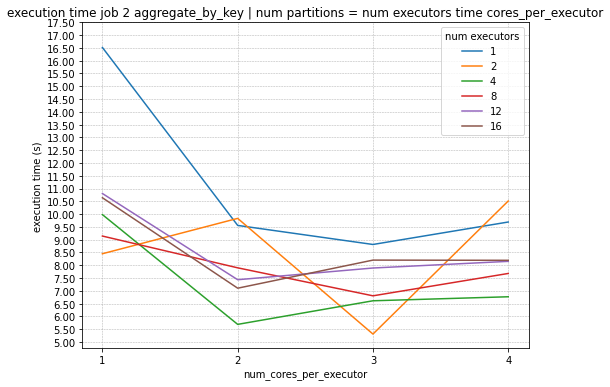

In [11]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from numpy import arange

y_label = "job2_time"  # "total_time"
x_label = "num_cores_per_executor"
grouping_label = "num_executors"
df1_m = res_t_m[[y_label, x_label, grouping_label]]

#print(df1_m.columns)

df1_m.sort_values(by=x_label, axis=0, inplace=True)
#df1.set_index(x_label, inplace=True)


fig, ax = plt.subplots(figsize=(8, 6))

#tmp = df1.groupby(grouping_label).plot(x=x_label, y=y_label, ax=ax, label=grouping_label)

for label, df_tmp in df1_m.groupby(grouping_label):
    df_tmp.sort_values(x_label, axis=0, ascending=True, inplace=True)

    df_tmp.plot(x=x_label, y=y_label, ax=ax, label=int(label))

ax.legend(title="num executors")
plt.ylabel("execution time (s)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

#plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.xticks(range(1, 5))  # to hide decimals from the x axis

plt.yticks(arange(int(min(df1_m[y_label])), max(df1_m[y_label])+1, 0.5))


plt.grid(linestyle='--', linewidth=0.5)

ax.set_title(
    "execution time job 2 aggregate_by_key | num partitions = num executors time cores_per_executor")

plt.show()


C:\Users\giaco\AppData\Local\Temp\ipykernel_10296\2520098388.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_m.sort_values(by=x_label, axis=0, inplace=True)


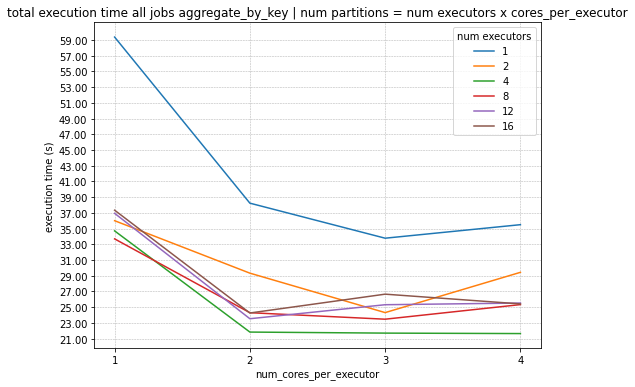

In [14]:
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from numpy import arange

y_label = "total_time"  # "total_time"
x_label = "num_cores_per_executor"
grouping_label = "num_executors"
df1_m = res_t_m[[y_label, x_label, grouping_label]]

#print(df1_m.columns)

df1_m.sort_values(by=x_label, axis=0, inplace=True)
#df1.set_index(x_label, inplace=True)


fig, ax = plt.subplots(figsize=(8, 6))

#tmp = df1.groupby(grouping_label).plot(x=x_label, y=y_label, ax=ax, label=grouping_label)

for label, df_tmp in df1_m.groupby(grouping_label):
    df_tmp.sort_values(x_label, axis=0, ascending=True, inplace=True)

    df_tmp.plot(x=x_label, y=y_label, ax=ax, label=int(label))

ax.legend(title="num executors")
plt.ylabel("execution time (s)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

#plt.xticks(ticks=plt.xticks()[0], labels=plt.xticks()[0].astype(int))
plt.xticks(range(1, 5))  # to hide decimals from the x axis

plt.yticks(arange(int(min(df1_m[y_label])), max(df1_m[y_label])+1, 2))


plt.grid(linestyle='--', linewidth=0.5)

ax.set_title(
    "total execution time all jobs aggregate_by_key | num partitions = num executors x cores_per_executor")

plt.show()
